In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

- Img2prb
    - Input: Image 
    - Output: {pixel: prob}


- Intensity Trasnform 
    - Input: {pixel: prob}
    - Output: {s:r} # a mapping between s to r
    
- map2img
    - Input: Input Image, {s:r}
    - Output: Final Image got from mapping r to s 

- Plot histogram
    - Input: Image 
    - Output: Plot histogram 

In [2]:
im = cv2.imread("light_image.tif")

In [3]:
im.shape

(500, 500, 3)

In [4]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

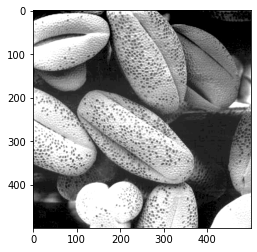

In [5]:
plt.imshow(gray, cmap="gray")

In [6]:
def img2prob(image):
    """
    Given an input image (gray scale), it returns the dict {pixel: prob}
    Assuming that intensity level is 256 (8 bit image)
    """
    unique, counts = np.unique(image, return_counts=True)
    
    # set the dictionaty {pixel:0}
    prob_dict = {i:0 for i in range(0,256)}
    for (pixel_value, count) in zip(unique, counts):
        prob_dict[pixel_value] = count
    
    #convert from freq to prob
    prob_dict = {k:v / sum(prob_dict.values()) for k,v in prob_dict.items()}
    
    return prob_dict

In [11]:
prob_dict = img2prob(gray)

In [12]:
sum(prob_dict.values())

1.0000000000000002

In [13]:
def plot_histogram(image):
    b, bins, patches = plt.hist(image, 255)
    plt.xlim([0,255])
    plt.show()

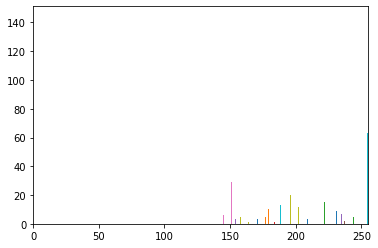

In [14]:
plot_histogram(gray)